# Analysizing Crime Data

In [2]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import glm
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
file = "SummaryData_Pop.csv"
df = pd.read_csv(file)
df.head()

,City,Year,Month,DayofWeek,StartTime,MapCrime,MapWeather,Population,Count
0,atlanta,2014,1,Friday,0,Auto-Theft,Clear,5455053,1
1,atlanta,2014,1,Friday,0,Theft,Clear,5455053,9
2,atlanta,2014,1,Friday,0,Theft,Overcast,5455053,1
3,atlanta,2014,1,Friday,0,Theft,Partly Cloudy,5455053,2
4,atlanta,2014,1,Friday,0,Violence,Overcast,5455053,1


In [4]:
df.head()

,City,Year,Month,DayofWeek,StartTime,MapCrime,MapWeather,Population,Count
0,atlanta,2014,1,Friday,0,Auto-Theft,Clear,5455053,1
1,atlanta,2014,1,Friday,0,Theft,Clear,5455053,9
2,atlanta,2014,1,Friday,0,Theft,Overcast,5455053,1
3,atlanta,2014,1,Friday,0,Theft,Partly Cloudy,5455053,2
4,atlanta,2014,1,Friday,0,Violence,Overcast,5455053,1


In [5]:
file = "weather_df.csv"
weather = pd.read_csv(file)
weather.head()

,city,weather,date,time
0,atlanta,Overcast,2013-12-31,5
1,atlanta,Overcast,2013-12-31,6
2,atlanta,Overcast,2013-12-31,7
3,atlanta,Overcast,2013-12-31,8
4,atlanta,Overcast,2013-12-31,9


In [6]:
file = "weathermap.csv"
weathermap = pd.read_csv(file)
weathermap.head()

,Weather,MapWeather
0,Clear,Clear
1,Drizzle,Rain
2,Drizzle and Humid,Rain
3,Flurries,Snow
4,Foggy,Rain


In [7]:
df_weather = pd.merge(weather, weathermap, how='inner', left_on = "weather", right_on = "Weather")
df_weather.head()

,city,weather,date,time,Weather,MapWeather
0,atlanta,Overcast,2013-12-31,5,Overcast,Overcast
1,atlanta,Overcast,2013-12-31,6,Overcast,Overcast
2,atlanta,Overcast,2013-12-31,7,Overcast,Overcast
3,atlanta,Overcast,2013-12-31,8,Overcast,Overcast
4,atlanta,Overcast,2013-12-31,9,Overcast,Overcast


In [8]:
fields1 = ["city", "MapWeather", "time"]
df2 = df_weather.groupby(fields1).agg("count")
df2 = df2.rename(columns = {"date" : "Count"})
df2.drop('weather', axis=1, inplace=True)
df2.drop('Weather', axis=1, inplace=True)
print(df2.head())
df.head()

                         Count
city    MapWeather time       
atlanta Clear      0       527
                   1       614
                   2       674
                   3       719
                   4       885


,City,Year,Month,DayofWeek,StartTime,MapCrime,MapWeather,Population,Count
0,atlanta,2014,1,Friday,0,Auto-Theft,Clear,5455053,1
1,atlanta,2014,1,Friday,0,Theft,Clear,5455053,9
2,atlanta,2014,1,Friday,0,Theft,Overcast,5455053,1
3,atlanta,2014,1,Friday,0,Theft,Partly Cloudy,5455053,2
4,atlanta,2014,1,Friday,0,Violence,Overcast,5455053,1


In [9]:
df2.to_csv("weather_summary.csv", sep=',', encoding='utf-8')

In [10]:
df3 = pd.merge(df, df2, how='inner', left_on = ["City","MapWeather","StartTime"], right_on = ["city","MapWeather","time"])
df3.head()

,City,Year,Month,DayofWeek,StartTime,MapCrime,MapWeather,Population,Count_x,Count_y
0,atlanta,2014,1,Friday,0,Auto-Theft,Clear,5455053,1,527
1,atlanta,2014,1,Friday,0,Theft,Clear,5455053,9,527
2,atlanta,2014,1,Monday,0,Auto-Theft,Clear,5455053,1,527
3,atlanta,2014,1,Monday,0,Theft,Clear,5455053,5,527
4,atlanta,2014,1,Monday,0,Violence,Clear,5455053,1,527


In [11]:
df3["ratio"] = df3["Count_x"] / df3["Count_y"]
df_glm = df3.copy()
df_glm.head()

,City,Year,Month,DayofWeek,StartTime,MapCrime,MapWeather,Population,Count_x,Count_y,ratio
0,atlanta,2014,1,Friday,0,Auto-Theft,Clear,5455053,1,527,0.001898
1,atlanta,2014,1,Friday,0,Theft,Clear,5455053,9,527,0.017078
2,atlanta,2014,1,Monday,0,Auto-Theft,Clear,5455053,1,527,0.001898
3,atlanta,2014,1,Monday,0,Theft,Clear,5455053,5,527,0.009488
4,atlanta,2014,1,Monday,0,Violence,Clear,5455053,1,527,0.001898


In [12]:
obj_list = df3.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
le = LabelEncoder()

for i in obj_list.index:
    try:
        le.fit(df_glm[i])
        df_glm[i] = le.transform(df_glm[i])
    except:
        df_glm[i] = pd.get_dummies(df_glm[i])

In [13]:
df_glm.head()

,City,Year,Month,DayofWeek,StartTime,MapCrime,MapWeather,Population,Count_x,Count_y,ratio
0,0,2014,1,0,0,0,0,5455053,1,527,0.001898
1,0,2014,1,0,0,3,0,5455053,9,527,0.017078
2,0,2014,1,1,0,0,0,5455053,1,527,0.001898
3,0,2014,1,1,0,3,0,5455053,5,527,0.009488
4,0,2014,1,1,0,5,0,5455053,1,527,0.001898


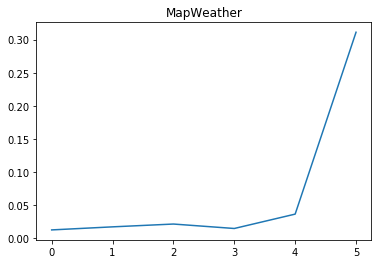

In [21]:
i = 6
d1 = df_glm.groupby(df_glm.columns[i])
plt.plot(d1["ratio"].mean())
plt.title(df_glm.columns[i])
plt.show()

In [15]:
a = df.columns[0]
b = df.columns[1]
c = df.columns[2]
d = df.columns[3]
e = df.columns[4]
f = df.columns[5]
g = df.columns[6]

form1 = "ratio ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e + " + " + g
print(form1)
form2 = "ratio ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
print(form2)

ratio ~ City + Year + Month + DayofWeek + StartTime + MapWeather
ratio ~ City + Year + Month + DayofWeek + StartTime


In [16]:
model_ols = glm(formula = form1, data = df_glm, family = sm.families.Gaussian()).fit()
print(model_ols.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  ratio   No. Observations:               433243
Model:                            GLM   Df Residuals:                   433236
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                       0.0025534
Method:                          IRLS   Log-Likelihood:             6.7856e+05
Date:                Tue, 22 Oct 2019   Deviance:                       1106.2
Time:                        21:05:06   Pearson chi2:                 1.11e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8545      0.119    -32.331      0.000      -4.088      -3.621
City           0.0034   5.89e-05     57.527      0.0

In [17]:
model_ols = glm(formula = form2, data = df_glm, family = sm.families.Gaussian()).fit()
print(model_ols.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  ratio   No. Observations:               433243
Model:                            GLM   Df Residuals:                   433237
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                       0.0026306
Method:                          IRLS   Log-Likelihood:             6.7210e+05
Date:                Tue, 22 Oct 2019   Deviance:                       1139.7
Time:                        21:05:07   Pearson chi2:                 1.14e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8092      0.121    -31.478      0.000      -4.046      -3.572
City           0.0027   5.95e-05     45.732      0.0

In [19]:
a = df.columns[0]
b = df.columns[1]
c = df.columns[2]
d = df.columns[3]
e = df.columns[4]
f = df.columns[5]
g = df.columns[6]

form3 = "ratio ~ " +  e + " + " + g
print(form3)

ratio ~ StartTime + MapWeather


In [20]:
model_ols = glm(formula = form3, data = df_glm, family = sm.families.Gaussian()).fit()
print(model_ols.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  ratio   No. Observations:               433243
Model:                            GLM   Df Residuals:                   433240
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                       0.0025768
Method:                          IRLS   Log-Likelihood:             6.7658e+05
Date:                Tue, 22 Oct 2019   Deviance:                       1116.4
Time:                        21:07:11   Pearson chi2:                 1.12e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0046      0.000     25.757      0.000       0.004       0.005
StartTime      0.0004   1.14e-05     32.474      0.0

In [22]:
fields1 = ["MapWeather"]
df4 = df3[["MapWeather", "ratio"]].copy()
df5 = df4.groupby("MapWeather").agg("mean")
print(df5.head())

                  ratio
MapWeather             
Clear          0.012277
Mostly Cloudy  0.016907
Overcast       0.021160
Partly Cloudy  0.014442
Rain           0.036173
